### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
# Clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# For 3D plotting 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [14]:
from sklearn.preprocessing import StandardScaler

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
vdf = pd.read_csv('vehicle.csv')

In [4]:
#Missing data
vdf.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [ ]:
vdf = vdf.replace('', np.nan)

In [5]:
X = vdf.drop(columns=['class'])

In [41]:
y = vdf['class']

In [6]:
X = X.apply(lambda x: x.fillna(x.median()),axis=0)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [11]:
vdf['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

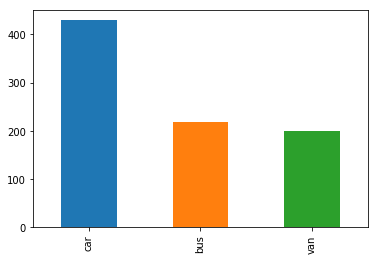

In [10]:
vdf['class'].value_counts().plot('bar')

### Check for any missing values in the data 

In [ ]:
# Already done in 1

### 3. Standardize the data 

In [16]:
#Using StandardScaler to standardize the data

sc = StandardScaler()
X_std =  sc.fit_transform(X)

C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [17]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [18]:
# k means determine k
distortions = []


You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [21]:
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(
        sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

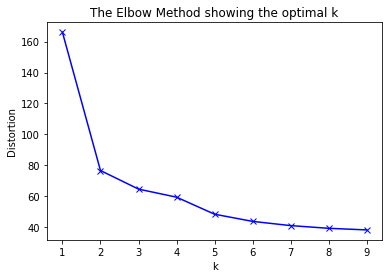

In [22]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [23]:
# Hence the drop in distortion is high after the first iteration i.e. k=1
# For the k = 2 as well the drop in distortion is significant.
# After k=3 drop in distortion is not much

# So Optimal value for K would be 3

In [31]:
# Build kmeans clustering model using k=3

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_
clusters

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0,

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [35]:
X.shape

(846, 18)

In [37]:
# Extract cluster centers and use them for re-running the KMeans algorithm again
cluster_center = kmeans.cluster_centers_

cluster_center.shape

(3, 18)

In [34]:
# Provide the cluster center values as input for the second KMeans algorithm run

kmeans = KMeans(n_clusters=3,init=cluster_center)
kmeans.fit(X)

C:\Users\Sia\Anaconda2\envs\Python3.6\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
    init=array([[104.09048,  52.90952, 102.67619, 201.09524,  61.92381,   9.72857,
        217.60476,  30.65238,  24.42381, 166.44762, 230.44286, 703.59524,
        214.49524,  72.71905,   7.34286,  15.60952, 187.91429, 196.13333],
       [ 88.38889,  41.24897,  71.33333, 146.73868,  60.40535,   7.94856... , 202.42   , 485.00333,
        174.96667,  69.08667,   5.86667,  13.88   , 193.72667, 200.35333]]),
    max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [38]:
centroid_df = pd.DataFrame(data=cluster_center, columns=X.columns)

Hint: Use pd.Dataframe function 

In [39]:
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,104.090476,52.909524,102.676190,201.095238,61.923810,9.728571,217.604762,30.652381,24.423810,166.447619,230.442857,703.595238,214.495238,72.719048,7.342857,15.609524,187.914286,196.133333
1,88.388889,41.248971,71.333333,146.738683,60.405350,7.948560,144.609053,46.691358,18.724280,140.316872,166.248971,311.017490,157.434156,73.360082,6.090535,10.905350,187.868313,193.958848
2,96.240000,45.086667,88.180000,195.486667,65.453333,8.946667,179.346667,36.686667,21.213333,147.060000,202.420000,485.003333,174.966667,69.086667,5.866667,13.880000,193.726667,200.353333


### Use kmeans.labels_ function to print out the labels of the classes

In [36]:
kmeans.labels_

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0,

In [40]:
cluster_lb_df = pd.DataFrame(data = kmeans.labels_, columns=['clustered_class'])

In [44]:
cluster_lb_df.shape

(846, 1)

In [48]:
cluster_lb_df['class'] = y

In [52]:
cluster_lb_df.head(5)

,clustered_class,class
0,1,van
1,1,van
2,0,car
3,1,van
4,1,bus


In [53]:
pd.concat([X, cluster_lb_df], axis=1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,clustered_class,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,1,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,1,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,0,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,1,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,1,bus
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,0,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,1,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,1,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,1,van
9,93,44.0,98.0,167.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,2,car


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [57]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [66]:
X = np.concatenate((a, b, c),)


In [71]:
print(a.shape)
print(b.shape)
print(c.shape)


(100, 2)
(50, 2)
(100, 2)


In [72]:
X.shape

(250, 2)

In [73]:
columns_names = ['A', 'B']

In [74]:
X = pd.DataFrame(X, columns=columns_names)

### 10. Use scatter matrix to print all the 3 distributions

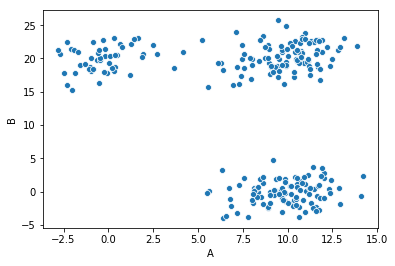

In [75]:
sns.scatterplot(X['A'], X['B'])

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

### 11. Find out the linkage matrix

In [78]:
# generate the linkage matrix
Z = linkage(X, 'ward', metric='euclidean')

Use ward as linkage metric and distance as Eucledian

In [80]:
Z

array([[1.40000000e+01, 2.30000000e+01, 5.10489099e-02, 2.00000000e+00],
       [5.30000000e+01, 8.10000000e+01, 6.92759030e-02, 2.00000000e+00],
       [1.68000000e+02, 2.28000000e+02, 7.24253426e-02, 2.00000000e+00],
       [5.00000000e+01, 5.40000000e+01, 1.10149035e-01, 2.00000000e+00],
       [6.00000000e+01, 6.60000000e+01, 1.16557942e-01, 2.00000000e+00],
       [2.12000000e+02, 2.24000000e+02, 1.22610956e-01, 2.00000000e+00],
       [3.30000000e+01, 3.90000000e+01, 1.24913033e-01, 2.00000000e+00],
       [1.81000000e+02, 2.18000000e+02, 1.25083542e-01, 2.00000000e+00],
       [2.07000000e+02, 2.30000000e+02, 1.26620450e-01, 2.00000000e+00],
       [1.60000000e+02, 2.47000000e+02, 1.32707026e-01, 2.00000000e+00],
       [2.22000000e+02, 2.36000000e+02, 1.42400003e-01, 2.00000000e+00],
       [1.41000000e+02, 1.47000000e+02, 1.45312873e-01, 2.00000000e+00],
       [1.51000000e+02, 1.69000000e+02, 1.46907113e-01, 2.00000000e+00],
       [1.53000000e+02, 1.83000000e+02, 1.59484079e

### 12. Plot the dendrogram for the consolidated dataframe

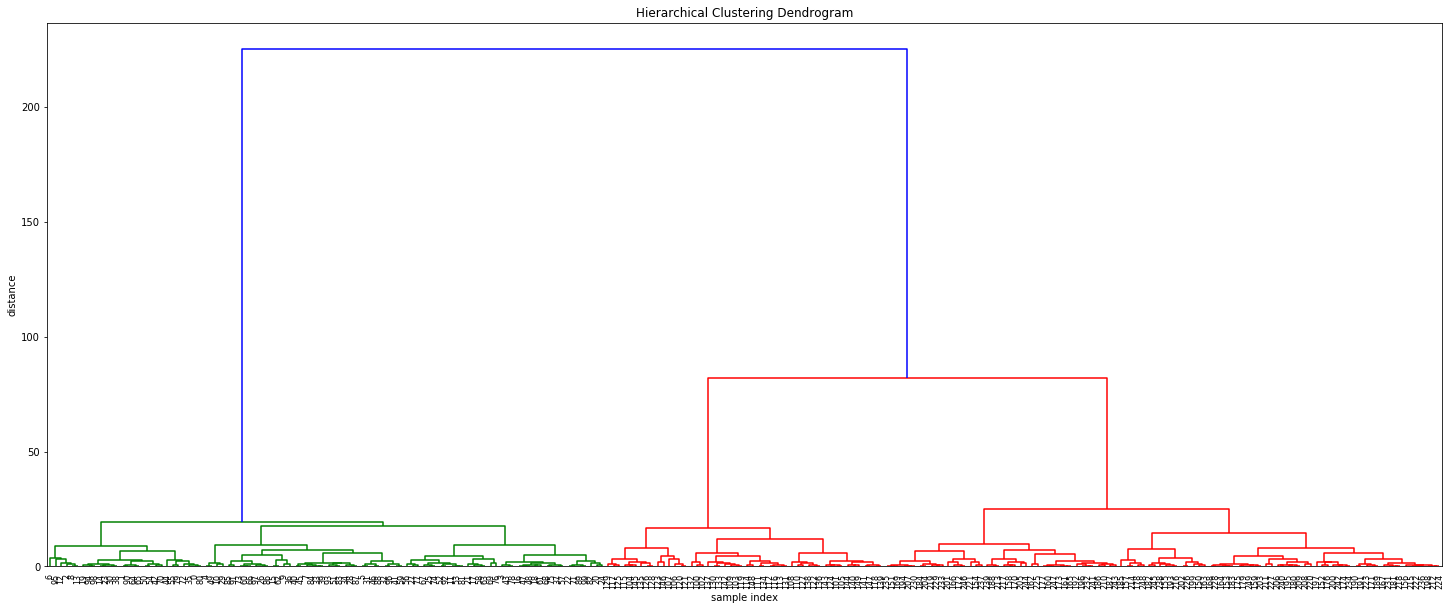

In [81]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

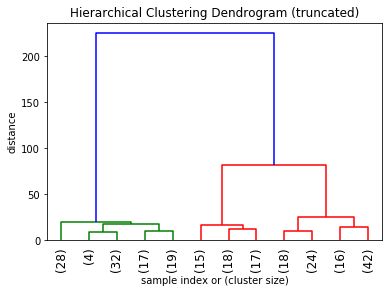

In [82]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

Selecting a Distance Cut-Off aka Determining the Number of Clusters

A huge jump in distance is typically what we're interested in if we want to argue for a certain number of clusters. If you have the chance to do this manually, i'd always opt for that, as it allows you to gain some insights into your data and to perform some sanity checks on the edge cases. In our case i'd probably just say that our cut-off is 50, as the jump is pretty obvious

In [83]:
#So using optimal distance of 50 we have 3 clusters

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [84]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

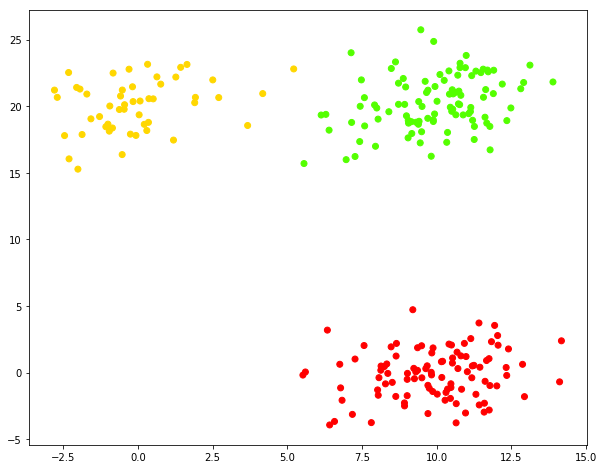

In [87]:
plt.figure(figsize=(10, 8))
plt.scatter(X['A'], X['B'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()